In [4]:
import sys
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
os.chdir(os.getcwd())
data_path = "data/origin/"
os.listdir(data_path)

['jdata_user_action.csv',
 'jdata_user_basic_info.csv',
 'jdata_sku_basic_info.csv',
 'jdata_user_order.csv',
 'jdata_user_comment_score.csv']

In [7]:
user_info = pd.read_csv(os.path.join(data_path, "jdata_user_basic_info.csv"))
user_action = pd.read_csv(os.path.join(data_path, "jdata_user_action.csv"))
sku_info = pd.read_csv(os.path.join(data_path, "jdata_sku_basic_info.csv"))
user_order = pd.read_csv(os.path.join(data_path, "jdata_user_order.csv"))
user_order.drop("o_id", axis=1, inplace=True)
user_order = user_order.groupby(["user_id", "sku_id", "o_date", "o_area"])["o_sku_num"].sum().reset_index()
user_comment = pd.read_csv(os.path.join(data_path, "jdata_user_comment_score.csv"))

### 用户基本信息

In [62]:
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98924 entries, 0 to 98923
Data columns (total 4 columns):
user_id       98924 non-null int64
age           98924 non-null int64
sex           98924 non-null int64
user_lv_cd    98924 non-null int64
dtypes: int64(4)
memory usage: 3.0 MB


In [63]:
user_info.describe()

,user_id,age,sex,user_lv_cd
count,98924.000000,98924.000000,98924.000000,98924.000000
mean,49462.500000,2.190459,1.489022,3.243288
std,28557.043352,1.937132,0.811357,1.067706
min,1.000000,-1.000000,0.000000,1.000000
25%,24731.750000,2.000000,1.000000,2.000000
50%,49462.500000,3.000000,2.000000,3.000000
75%,74193.250000,3.000000,2.000000,4.000000
max,98924.000000,6.000000,2.000000,5.000000


Text(0.5,1,'user age')

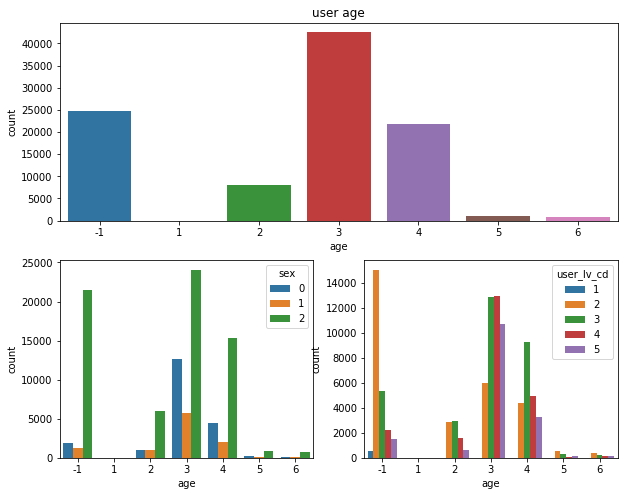

In [4]:
f = plt.figure(figsize=(10,8))
ax3 = plt.subplot(211)
sns.countplot(data=user_info, x="age")
ax1 = plt.subplot(223)
sns.countplot(data=user_info, x="age", hue="sex", ax=ax1)
ax2 = plt.subplot(224)
sns.countplot(data=user_info, x="age", hue="user_lv_cd", ax=ax2)
ax3.set_title("user age")

In [9]:
ui_uo = pd.merge(left=user_order, right=user_info, on="user_id")

In [10]:
ui_uo

,user_id,sku_id,o_date,o_area,o_sku_num,age,sex,user_lv_cd
0,1,16607,2017-01-12,14,1,3,2,3
1,1,16607,2017-02-12,14,1,3,2,3
2,1,80036,2017-03-09,14,1,3,2,3
3,1,80036,2017-03-22,14,2,3,2,3
4,1,80036,2017-04-14,14,1,3,2,3
5,1,80036,2017-04-30,14,1,3,2,3
6,2,44666,2017-04-24,27,2,3,2,3
7,3,2816,2017-03-03,26,1,3,0,5
8,3,9833,2017-03-03,26,1,3,0,5
9,3,16080,2016-06-18,26,2,3,0,5


### 用户行为

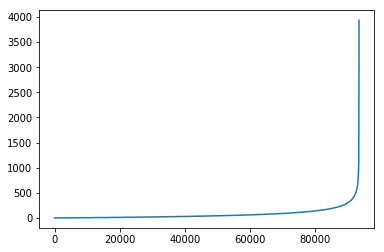

In [16]:
plt.plot(user_action.groupby("user_id")["user_id"].count().sort_values().values)

In [12]:
user_action.groupby("a_type")["a_num"].sum()

a_type
1    13890115
2       70590
Name: a_num, dtype: int64

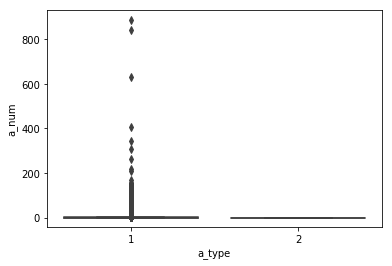

In [17]:
sns.boxplot(x="a_type", y="a_num", data=user_action)

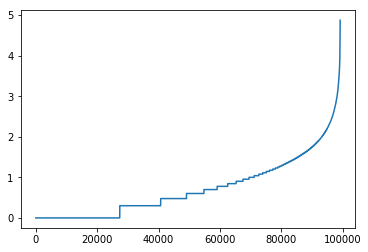

In [20]:
plt.plot(np.log10(user_action.groupby("sku_id")["sku_id"].count().sort_values().values))

### 用户下单信息

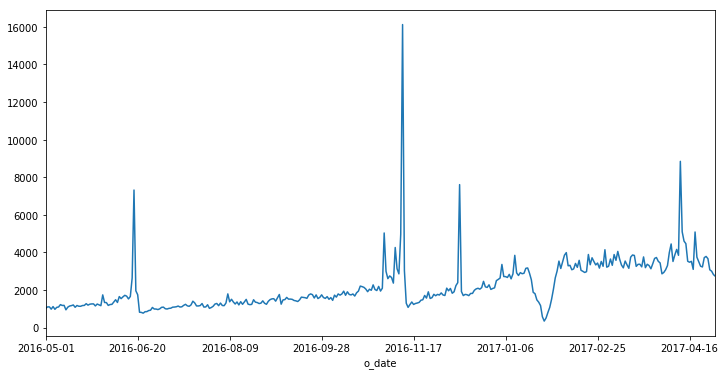

In [60]:
user_order.groupby("o_date")["user_id"].count().plot(figsize=(12, 6))

In [96]:
user_order.groupby("user_id")["user_id"].count().apply(lambda x: 0 if x==1 else 1).mean()

0.815474505681129

In [77]:
user_order.head()

,user_id,sku_id,o_id,o_date,o_area,o_sku_num
0,1,80036,480066,2017-03-09,14,1
1,1,16607,106933,2017-01-12,14,1
2,1,80036,542604,2017-04-14,14,1
3,1,80036,196335,2017-04-30,14,1
4,1,80036,42502,2017-03-22,14,2


### 用户评论

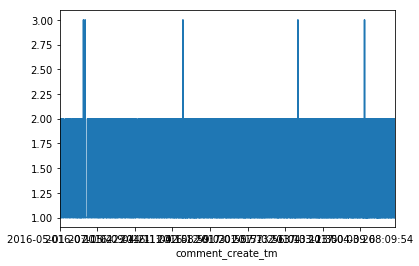

In [33]:
user_comment.groupby("comment_create_tm")["user_id"].count().plot()

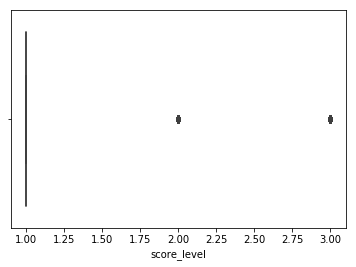

In [35]:
sns.boxplot("score_level", data=user_comment)

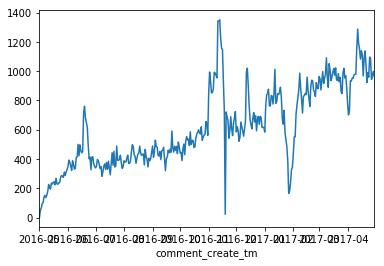

In [43]:
user_comment["comment_create_tm"] = pd.to_datetime(user_comment.comment_create_tm)
user_comment.groupby(user_comment.comment_create_tm.dt.date)["user_id"].count().plot()

In [58]:
user_order.groupby("o_date")["user_id"].count().index[0]

'2016-05-01'

In [57]:
user_comment.groupby(user_comment.comment_create_tm.dt.date)["user_id"].count().index[0]

datetime.date(2016, 5, 1)

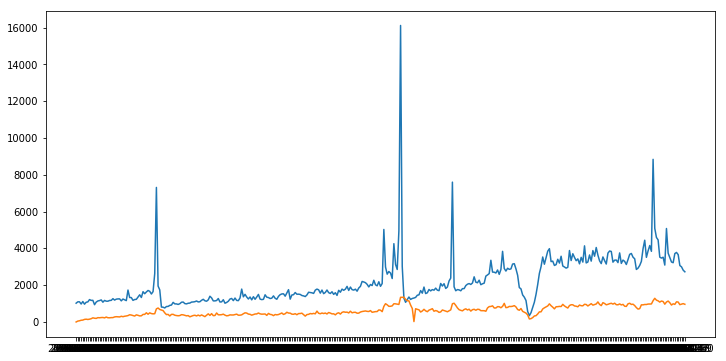

In [59]:
f = plt.figure(figsize=(12,6))
plt.plot(user_order.groupby("o_date")["user_id"].count())
plt.plot(user_comment.groupby(user_comment.comment_create_tm.dt.date)["user_id"].count().values)

### sku 基本信息

In [5]:
sku_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99412 entries, 0 to 99411
Data columns (total 6 columns):
sku_id    99412 non-null int64
price     99412 non-null float64
cate      99412 non-null int64
para_1    99412 non-null float64
para_2    99412 non-null int64
para_3    99412 non-null int64
dtypes: float64(2), int64(4)
memory usage: 4.6 MB


In [6]:
sku_info.describe()

,sku_id,price,cate,para_1,para_2,para_3
count,99412.000000,9.941200e+04,99412.000000,99412.000000,99412.000000,99412.000000
mean,49706.500000,1.404066e+03,71.675331,187.836283,-0.070595,-0.117119
std,28697.916818,2.480563e+04,28.310322,4139.406198,1.696164,1.878670
min,1.000000,4.300000e+00,1.000000,0.080000,-1.000000,-1.000000
25%,24853.750000,2.732000e+02,71.000000,40.580000,-1.000000,-1.000000
50%,49706.500000,5.956500e+02,71.000000,74.090000,-1.000000,-1.000000
75%,74559.250000,1.185000e+03,101.000000,104.872500,-1.000000,-1.000000
max,99412.000000,3.880033e+06,101.000000,475292.880000,6.000000,7.000000
